In [1]:
### Data Analysis menggunakan Python Pandas
### Data Visualization menggunakan Matplotlib
### Dataset yang digunakan: Data Sales Januari - Desember 2019

## Pertanyaan 1: Kota apa yang memberikan penjualan terbanyak selama satu tahun?
## Pertanyaan 2: Pada bulan apakah penjualan terbanyak dan berapa yang didapatkan?
## Pertanyaan 3: Pada pukul berapa iklan harus lebih banyak ditampilkan?
## Pertanyaan 4: Product apa yang terjual paling banyak?

In [2]:
## Mengimport library yang dibutuhkan untuk melakukan analisis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
## Menggabungkan data sales perbulan menjadi satu file dataset

In [5]:
df = pd.read_csv("./sales_data/Sales_April_2019.csv")

files = [file for file in os.listdir('./sales_data')]

semua_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./sales_data/"+file)
    semua_data = pd.concat([semua_data, df])

In [6]:
## Mengeksport dataset yang berisi seluruh penjualan

In [7]:
semua_data.to_csv("semua_data.csv", index=False)

In [8]:
## Membaca dataset baru

In [9]:
semua_data = pd.read_csv("semua_data.csv")
semua_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [10]:
## Melakukan data exploration, cleaning, formatting, normalization, binning

In [11]:
# Mengecek dataset apakah terdapat data kosong/NaN/Null values

In [12]:
null_values = semua_data[semua_data.isna().any(axis=1)]
null_values.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
1571,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN
2265,NaN,NaN,NaN,NaN,NaN,NaN
2798,NaN,NaN,NaN,NaN,NaN,NaN
3024,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Menghapus baris data yang memiliki values NaN pada setiap kolomnya

In [14]:
semua_data = semua_data.dropna(how="all")

In [15]:
# Mengecek data yang tidak seharusnya atau duplikat data lain

In [16]:
data_duplikasi = semua_data[semua_data['Order Date'].str[0:2] == 'Or']
data_duplikasi.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [17]:
# Memperbaharui dataset untuk menghilangkan data duplikat seperti di atas

In [18]:
semua_data = semua_data[semua_data['Order Date'].str[0:2] != 'Or']

In [19]:
# Menkonversi tipe data string ke nilai numeric untuk kolom tertentu

In [20]:
semua_data['Quantity Ordered'] = pd.to_numeric(semua_data['Quantity Ordered'])
semua_data['Price Each'] = pd.to_numeric(semua_data['Price Each'])

In [21]:
#### Persiapan untuk pertanyaan 1: Kota apa yang memberikan penjualan terbanyak selama satu tahun?
## Kita perlu kolom baru yaitu total_sales dan city

In [22]:
semua_data['total_sales'] = semua_data['Quantity Ordered'] * semua_data['Price Each']

def get_city(alamat):
    return alamat.split(',')[1]

def get_state(alamat):
    return alamat.split(',')[2].split(' ')[1]

semua_data['city'] = semua_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
semua_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total_sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles CA


In [23]:
## Pertanyaan 1: Kota apa yang memberikan penjualan terbanyak selama satu tahun?

In [24]:
hasil = semua_data.groupby('city').sum()
hasil

,Quantity Ordered,Price Each,total_sales
city,,,
Atlanta GA,16602,2779908.20,2795498.58
Austin TX,11153,1809873.61,1819581.75
Boston MA,22528,3637409.77,3661642.01
Dallas TX,16730,2752627.82,2767975.40
Los Angeles CA,33289,5421435.23,5452570.80
New York City NY,27932,4635370.83,4664317.43
Portland ME,2750,447189.25,449758.27
Portland OR,11303,1860558.22,1870732.34
San Francisco CA,50239,8211461.74,8262203.91


<function matplotlib.pyplot.show(close=None, block=None)>

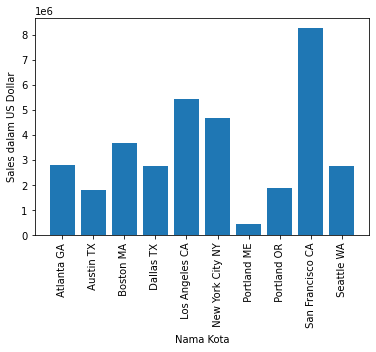

In [25]:
kota = [kota for kota, df in semua_data.groupby('city')]

plt.bar(kota,hasil['total_sales'])
plt.xticks(kota, rotation='vertical')
plt.ylabel('Sales dalam US Dollar')
plt.xlabel('Nama Kota')
plt.show

In [26]:
## Pertanyaan 1: Kota apa yang memberikan penjualan terbanyak selama satu tahun?
## Jawaban untuk pertanyaan 1 yaitu San Francisco CA

In [27]:
#### Persiapan untuk pertanyaan 2: Pada bulan apakah penjualan terbanyak dan berapa yang didapatkan?
## Kita perlu kolom baru yaitu month

In [28]:
semua_data['month'] = semua_data['Order Date'].str[0:2]
semua_data['month'] = semua_data['month'].astype('int32')
semua_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total_sales,city,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,Dallas TX,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,Boston MA,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles CA,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles CA,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles CA,4


In [29]:
## Pertanyaan 2: Pada bulan apakah penjualan terbanyak dan berapa yang didapatkan?

In [30]:
hasil = semua_data.groupby('month').sum()
hasil

,Quantity Ordered,Price Each,total_sales
month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


<function matplotlib.pyplot.show(close=None, block=None)>

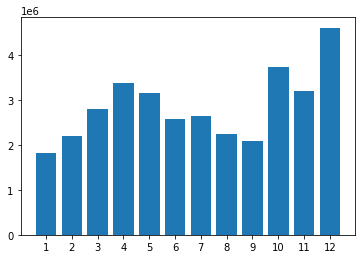

In [31]:
bulan = range(1,13)

plt.bar(bulan, hasil['total_sales'])
plt.xticks(bulan)
plt.show

In [32]:
## Pertanyaan 2: Pada bulan apakah penjualan terbanyak dan berapa yang didapatkan?
## Jawaban untuk pertanyaan 2 yaitu Bulan 12 atau Desember

In [33]:
#### Persiapan untuk pertanyaan 3: Pada pukul berapa iklan harus lebih banyak ditampilkan?
## Kita perlu kolom baru yaitu kolom hour

In [34]:
semua_data['Order Date'] = pd.to_datetime(semua_data['Order Date'])
semua_data['hour'] = semua_data['Order Date'].dt.hour
semua_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total_sales,city,month,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Dallas TX,4,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Boston MA,4,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles CA,4,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles CA,4,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles CA,4,9


In [35]:
## Pertanyaan 3: Pada pukul berapa iklan harus lebih banyak ditampilkan?

In [36]:
semua_data.groupby('hour').count()['Order ID']

hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order ID, dtype: int64

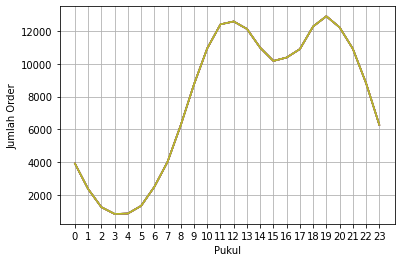

In [37]:
jam = [jam for jam, df in semua_data.groupby('hour')]

plt.plot(jam, semua_data.groupby(['hour']).count())
plt.xticks(jam)
plt.xlabel('Pukul')
plt.ylabel('Jumlah Order')
plt.grid()
plt.show()

In [38]:
## Pertanyaan 3: Pada pukul berapa iklan harus lebih banyak ditampilkan?
## Jawaban untuk pertanyaan 3 yaitu pukul 12 pagi dan 7 malam

In [39]:
#### Persiapan untuk pertanyaan 4: Product apa yang terjual paling banyak?
## Melakukan grouping dan count product per order ID

In [40]:
hasil = semua_data.groupby('Product').count()['Order ID']
hasil

Product
20in Monitor                   4101
27in 4K Gaming Monitor         6230
27in FHD Monitor               7507
34in Ultrawide Monitor         6181
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
Flatscreen TV                  4800
Google Phone                   5525
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21658
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
USB-C Charging Cable          21903
Vareebadd Phone                2065
Wired Headphones              18882
iPhone                         6842
Name: Order ID, dtype: int64

In [41]:
## Pertanyaan 4: Product apa yang terjual paling banyak?

<function matplotlib.pyplot.show(close=None, block=None)>

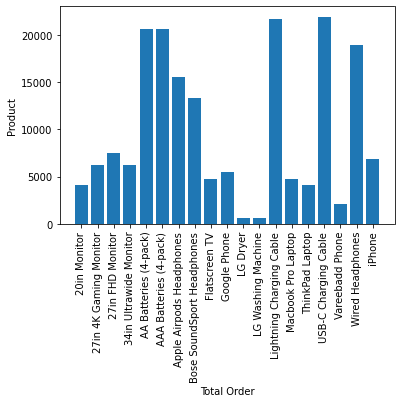

In [42]:
product = [product for product, df in semua_data.groupby('Product')]

plt.bar(product,hasil)
plt.xticks(product, rotation='vertical')
plt.ylabel('Product')
plt.xlabel('Total Order')
plt.show

In [43]:
## Pertanyaan 4: Product apa yang terjual paling banyak?
## Jawaban untuk pertanyaan 4 yaitu USB-C Charging Cable dan Lightning Charging Cable

In [44]:
##### Kesimpulan dari Analisis dengan Python Pandas

### Kota yang paling berpengaruh yaitu San Francisco CA dengan total penjualan $8262203.91
# Karena San Francisco merupakah salah satu kota terbesar dengan penghasilan perorangnya yang cukup tinggi

### Bulan ke-12 memberikan keuntungan terbesar dengan 28114 order dan penjualan $4613443.34
# Kemungkinan pada bulan Desember banyak hari besar seperti natal yang mendorong customer untuk membeli barang

### Memaksimalkan advertising product pada pukul 12 Siang dan 7 Malam, ada kecenderungan customer memesan banyak barang
# Pada kedua pukul itu banyak customer yang memesan barang sehingga bisa dipasang iklan untuk semakin mendorong customer belanja

### Product yang paling banyak dibeli oleh customer yaitu USB-C Charging Cable dan Lightning Charging Cable
# Product favorit customer adalah USB-C Charging Cable dan Lightning Charging Cable mungkin dikarenakan oleh harganya yang cukup terjangkau dan diperlukan setiap orang

In [45]:
semua_data.to_csv("data_final.csv")